# Linear programming

[Linear programming](https://en.wikipedia.org/wiki/Linear_programming) is one of the most important problems in optimization.

A linear program is an optimization problem of the following form:

$$
\begin{align*}
    \text{minimize} \quad & c \cdot x \\
    \text{subject to} \quad
    & A x = b \\
    & G x \leq h
\end{align*}
$$

where:
- $c \in \mathbb{R}^d$ is a cost vector
- $A \in \mathbb{R}^{n \times d}$ is an equality constraint matrix
- $b \in \mathbb{R}^n$ is an equality constraint vector
- $G \in \mathbb{R}^{m \times d}$ is an inequality constraint matrix
- $h \in \mathbb{R}^m$ is an inequality constraint vector

A linear program solver returns a solution $x \in \mathbb{R}^d$ to this problem, if one exists.

Optax has a solver based on the [restarted Halpern primal-dual hybrid gradient (RHPDHG) method](https://arxiv.org/abs/2407.16144), which is a [matrix-free](https://en.wikipedia.org/wiki/Matrix-free_methods) [primal-dual](https://en.wikipedia.org/wiki/Duality_(optimization)) algorithm.

## Example

Consider the following problem:

$$
\begin{align*}
\text{maximize} \quad 2 x + y & \\
\text{subject to} \quad
3 x + y &\leq 21 \\
x + y &\leq 9 \\
x + 4 y &\leq 24
\end{align*}
$$

Note that this is a maximization problem.

First, let's put this problem into the matrix form we described in the introduction.

In [1]:
from jax import numpy as jnp

# We are trying to maximize rather than minimize, so we use a minus sign here.
c = -jnp.array([2, 1])

# Our problem has no equality constraints, so we use a zero-size A and zero-size b.
A = jnp.zeros([0, 2])
b = jnp.zeros(0)

G = jnp.array([[3, 1], [1, 1], [1, 4]])
h = jnp.array([21, 9, 24])

Next, let's import optax and solve it.

In [2]:
import optax

x = optax.linprog.rhpdhg(c, A, b, G, h, 1_000_000)['primal']
print(x, c @ x)

[5.999964 2.999992] -14.99992


Up to a small numerical error, the solution is $(6, 3)$, with a profit of $15$.

Finally, let's plot the solution:

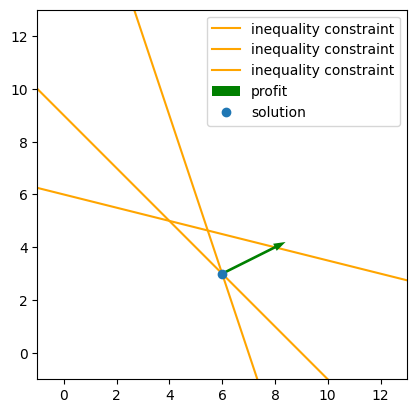

In [3]:
from matplotlib import pyplot as plt

def plot_lp(c, A, b, G, h, x):
    fig, ax = plt.subplots()

    for Ai, bi in zip(A, b):
        ax.axline((0, bi / Ai[1]), (bi / Ai[0], 0), label="equality constraint", c="purple")

    for Gi, hi in zip(G, h):
        ax.axline((0, hi / Gi[1]), (hi / Gi[0], 0), label="inequality constraint", c="orange")

    plt.arrow(x[0], x[1], -c[0].item(), -c[1].item(), width=0.1, ec="none", fc="green", label="profit", zorder=2)

    ax.plot(*x, "o", label="solution")

    ax.legend()
    ax.set(aspect="equal", xlim=(-1, 13), ylim=(-1, 13))
    plt.show()

plot_lp(c, A, b, G, h, x)

As you can see, the solution goes "as far as it can go" in the direction of increasing profit.

If we change the profit vector, we end up in a different place, because we want to maximize in a different direction:

[4.0000005 5.       ] -19.0


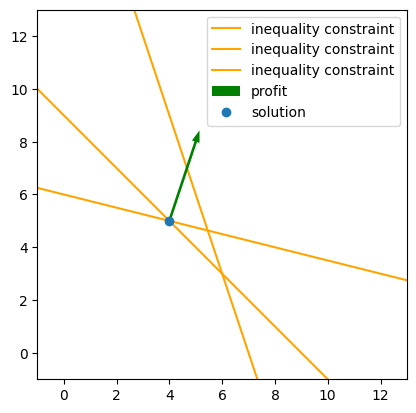

In [4]:
c = -jnp.array([1, 3])
x = optax.linprog.rhpdhg(c, A, b, G, h, 1_000_000)['primal']
print(x, c @ x)
plot_lp(c, A, b, G, h, x)